<a href="https://colab.research.google.com/github/Narra552244/Uncovering-The-Gaming-Industry-s-Hidden-Gems-A-Comprehensive-Analysis-Of-Video-Game-Sales/blob/main/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) 
 y_train shape: (60000,) 
 x_test shape: (10000, 28, 28) 
 y_test shape: (10000,)


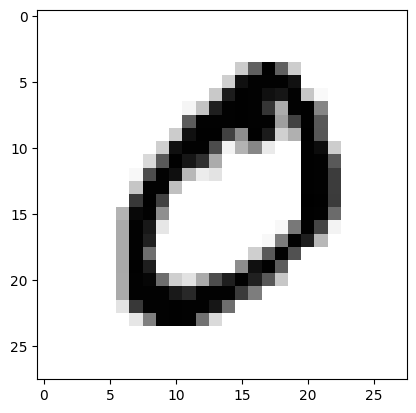

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "\n y_train shape:", y_train.shape,"\n x_test shape:", x_test.shape, "\n y_test shape:", y_test.shape)
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [2]:
### Normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
### Reshaping
x_train = x_train.reshape(-1,28, 28,1)
x_test = x_test.reshape(-1,28, 28, 1)

In [4]:
### Convolutional Neural Networks
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 74s 103ms/step - accuracy: 0.7711 - loss: 0.7126 - val_accuracy: 0.9698 - val_loss: 0.1026
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.9503 - loss: 0.1581 - val_accuracy: 0.9770 - val_loss: 0.0766
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 77s 110ms/step - accuracy: 0.9642 - loss: 0.1110 - val_accuracy: 0.9832 - val_loss: 0.0571
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.9700 - loss: 0.0937 - val_accuracy: 0.9832 - val_loss: 0.0538
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.9747 - loss: 0.0824 - val_accuracy: 0.9859 - val_loss: 0.0472
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 72s 103ms/step - accuracy: 0.9774 - loss: 0.0720 - val_accuracy: 0.9870 - val_loss: 0.0443
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 86s 108ms/step - accuracy: 0.9787 - loss: 0.0681 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.9816 - loss: 0

In [7]:
### Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
### Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9896000027656555


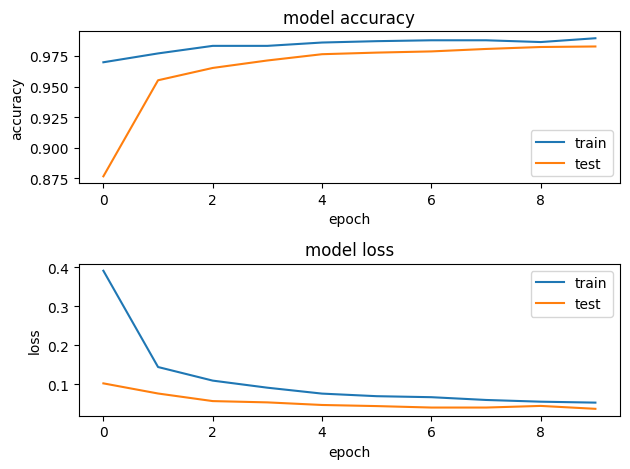

In [8]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['val_accuracy'])
plt.plot(model_log.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()


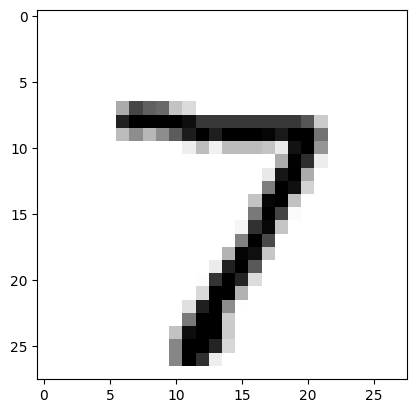

In [9]:
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [10]:
predictions = model.predict(x_test[0:1])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[2.8588878e-09, 9.4734595e-08, 7.5926650e-08, 1.8550884e-06,
        5.7493663e-11, 7.4930906e-09, 6.9644529e-13, 9.9999547e-01,
        1.2049598e-08, 2.3852676e-06]], dtype=float32)

In [11]:
np.argmax(predictions)

7

In [15]:
# saving model
model.save('/content/drive/MyDrive/projects/trainedModel.h5') # Added the .h5 extension to the filepath
print("Saving the model as trainedModel.h5")

Saving the model as trainedModel.h5
